In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
torch.cuda.is_available()

True

In [2]:
from Data_train import epoch 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

create_epoch_date = epoch.create_epoch_date

model_classifier = XGBClassifier(tree_method='hist')
model = XGBRegressor(tree_method='hist')
# X, Y = create_epoch()


# with open("Data_train/Saved/arrayX.txt", "a") as arrayX:
#           np.savetxt(arrayX, X, delimiter=",", fmt='%.4f')

# with open("Data_train/Saved/arrayY.txt", "a") as arrayY:
#           np.savetxt(arrayY, Y, delimiter=",", fmt='%.4f')


/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [3]:
X_2020 = np.loadtxt("/home/it/Desktop/NTMINH/Data/Data/data_train/arrayX_train_15_days_pred_1_days_2020.txt", delimiter=",")
Y_2020 = np.loadtxt("/home/it/Desktop/NTMINH/Data/Data/data_train/arrayY_train_15_days_pred_1_days_2020.txt", delimiter=",")

X_2021 = np.loadtxt("/home/it/Desktop/NTMINH/Data/Data/data_train/arrayX_train_15_days_pred_1_days_2021.txt", delimiter=",")
Y_2021 = np.loadtxt("/home/it/Desktop/NTMINH/Data/Data/data_train/arrayY_train_15_days_pred_1_days_2021.txt", delimiter=",")

X_2022 = np.loadtxt("/home/it/Desktop/NTMINH/Data/Data/data_train/arrayX_train_15_days_pred_1_days_2022.txt", delimiter=",")
Y_2022 = np.loadtxt("/home/it/Desktop/NTMINH/Data/Data/data_train/arrayY_train_15_days_pred_1_days_2022.txt", delimiter=",")

In [4]:
# Load tập dữ liệu cho model dự báo có bán trong ngày mai hay không

Y_2020_new = Y_2020 != 0
Y_2021_new = Y_2021 != 0
Y_2022_new = Y_2022 != 0

X_train = np.concatenate((X_2020, X_2021), axis = 0)
y_train = np.concatenate((Y_2020_new, Y_2021_new), axis = 0)

X_test = X_2022
y_test = Y_2022_new

In [7]:
model_classifier.load_model('/home/it/Desktop/NTMINH/Data/Data/data_train/model_train_15_days_predict_sale')

In [8]:
y_pred = model_classifier.predict(X_train)
y_pred_int = np.round(y_pred)

print('Tổng train giống nhau',np.sum(y_pred_int == y_train))
print('Tổng train khác nhau',np.sum(y_pred_int != y_train))

condition = np.where(y_train == 1)
condition2 = np.where(y_train == 0)

print('Đoán có bán: ', np.sum(y_pred_int == 1))
print('Đoán không bán: ', np.sum(y_pred_int == 0))

print('Số lượng có bán train',len(y_train[condition]))
print('Đoán trật có bán', np.sum(y_train[condition] != y_pred_int[condition]))
print('Đoán trúng có bán',np.sum(y_train[condition] == y_pred_int[condition]))

print('Số lượng không bán train', len(y_train[condition2]))
print('Đoán trật không bán',np.sum(y_train[condition2] != y_pred_int[condition2]))
print('Đoán trúng có bán',np.sum(y_train[condition2] == y_pred_int[condition2]))

Tổng train giống nhau 630074
Tổng train khác nhau 133479
Đoán có bán:  354514
Đoán không bán:  409039
Số lượng có bán train 335363
Đoán trật có bán 57164
Đoán trúng có bán 278199
Số lượng không bán train 428190
Đoán trật không bán 76315
Đoán trúng có bán 351875


In [10]:
y_pred = model_classifier.predict(X_test)
y_pred_int = np.round(y_pred)

print('Tổng test giống nhau',np.sum(y_pred_int == y_test))
print('Tổng test khác nhau',np.sum(y_pred_int != y_test))

condition = np.where(y_test == 1)
condition2 = np.where(y_test == 0)

print('Đoán có bán: ', np.sum(y_pred_int == 1))
print('Đoán không bán: ', np.sum(y_pred_int == 0))

print('Số lượng có bán train',len(y_test[condition]))
print('Đoán trật có bán', np.sum(y_test[condition] != y_pred_int[condition]))
print('Đoán trúng có bán',np.sum(y_test[condition] == y_pred_int[condition]))

print('Số lượng không bán train', len(y_test[condition2]))
print('Đoán trật không bán',np.sum(y_test[condition2] != y_pred_int[condition2]))
print('Đoán trúng không bán',np.sum(y_test[condition2] == y_pred_int[condition2]))

Tổng test giống nhau 47594
Tổng test khác nhau 3506
Đoán có bán:  14029
Đoán không bán:  37071
Số lượng có bán train 12359
Đoán trật có bán 918
Đoán trúng có bán 11441
Số lượng không bán train 38741
Đoán trật không bán 2588
Đoán trúng không bán 36153


In [12]:
# Quan tâm đến những mặt hàng bán khi khác 0 để train model dự đoán sức bán
X_2020_sale = X_2020[np.where(Y_2020 != 0)]
Y_2020_sale = Y_2020[np.where(Y_2020 != 0)]

X_2021_sale = X_2021[np.where(Y_2021 != 0)]
Y_2021_sale = Y_2021[np.where(Y_2021 != 0)]

### Train model dự đoán sức bán
X_train = np.concatenate((X_2020_sale, X_2021_sale), axis = 0)
y_train = np.concatenate((Y_2020_sale, Y_2021_sale), axis = 0)

# Riêng phần test sẽ kết hợp cả 2 model để xem xét
X_test = X_2022
y_test = Y_2022

model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [13]:
# make predictions for test data
y_pred = model.predict(X_train)
print('Loi tap train: ', 
          np.sqrt(np.square(np.subtract(y_train, y_pred))).sum()/y_test.shape[0])
# make predictions for test data
y_pred = model.predict(X_test)
print('Loi tap test: ', 
          np.sqrt(np.square(np.subtract(y_test, y_pred))).sum()/y_test.shape[0])
y_pred_int = np.asarray(y_pred, dtype = np.int32)
y_pred_int[y_pred_int < 0] = 0

print('Số lượng lable > 0',len(y_test[y_test > 0]))
print('Số lượng lable == 0',len(y_test[y_test == 0]))

print('Số lượng pred > 0',len(y_pred_int[y_pred_int > 0]))
print('Số lượng pred == 0',len(y_pred_int[y_pred_int == 0]))
print('Số lượng pred == 0',len(y_pred_int[y_pred_int < 0]))

# Tỉ lệ khi label = 0 và dự đoán đoán đúng
total = len(y_test[y_test == 0])
acc = ((y_test == 0) & (y_pred_int == 0)).sum()
print('Tỉ lệ khi label = 0 và dự đoán đoán đúng', acc/total)

# Tỉ lệ đoán khác 0 khi dữ liệu thật khác 0
total = len(y_test[y_test != 0])
acc = ((y_test != 0) & (y_pred_int != 0)).sum()

print('Tỉ lệ đoán khác 0 khi dữ liệu thật khác 0:',acc/total)

condition = np.where(y_test != 0)

print('Lỗi của những nhãn khác 0:',np.sqrt(np.square(np.subtract(y_test[condition], y_pred[condition]))).sum()/y_test.shape[0])

print('Sai số lớn nhất: ', np.max(np.subtract(y_test[condition], y_pred[condition])))
print('Sai số bé nhất: ', np.min(np.subtract(y_test[condition], y_pred[condition])))

Loi tap train:  12.940850506766573
Loi tap test:  6.035100243107913
Số lượng lable > 0 12359
Số lượng lable == 0 38741
Số lượng pred > 0 51003
Số lượng pred == 0 97
Số lượng pred == 0 0
Tỉ lệ khi label = 0 và dự đoán đoán đúng 0.0015487468057097133
Tỉ lệ đoán khác 0 khi dữ liệu thật khác 0: 0.9970062302775305
Lỗi của những nhãn khác 0: 0.8498404553824208
Sai số lớn nhất:  254.6571044921875
Sai số bé nhất:  -171.6983642578125


<AxesSubplot:>

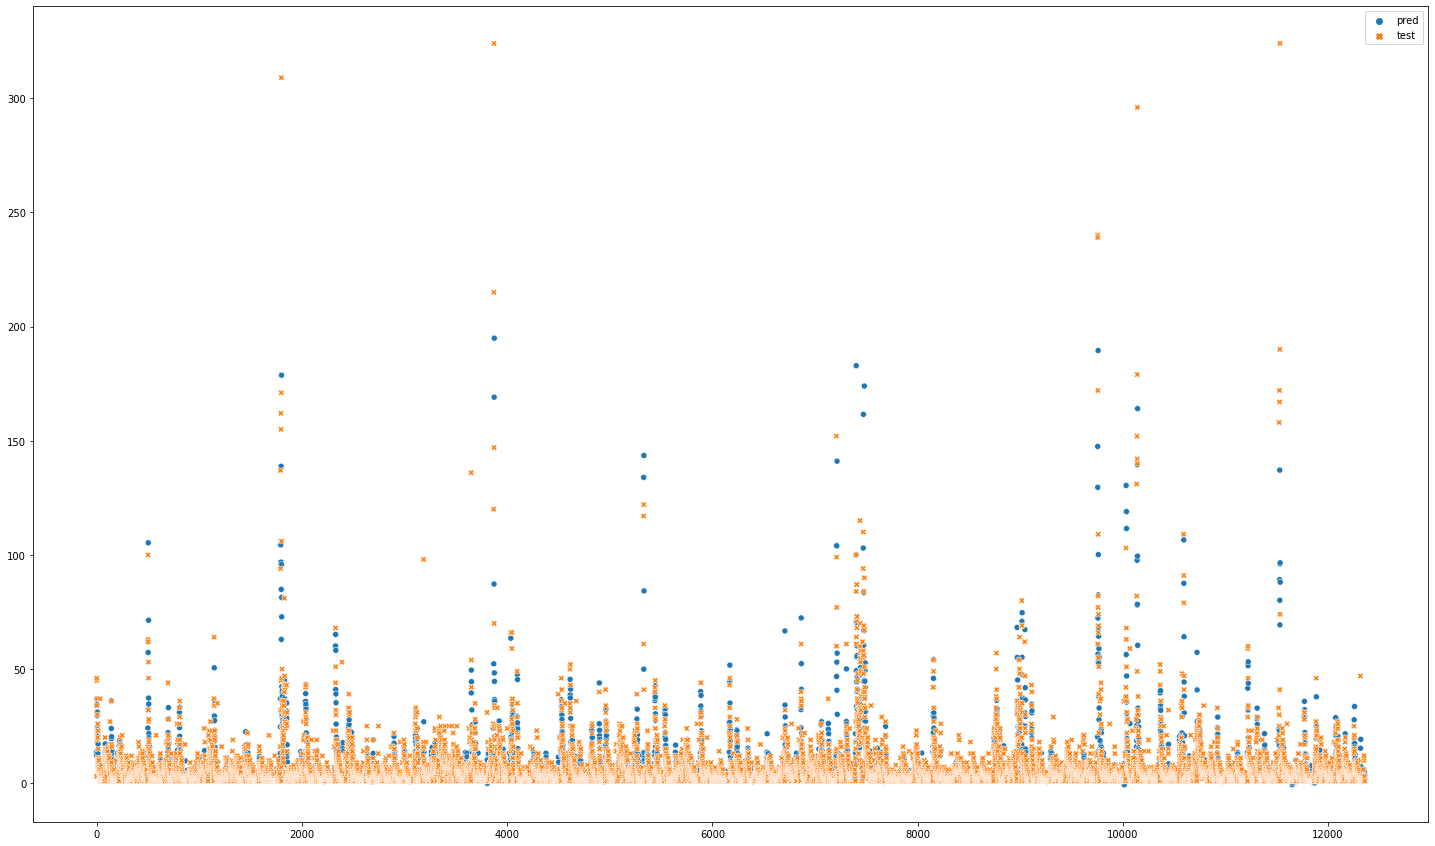

In [203]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
condition = np.where(y_test != 0)

df = pd.DataFrame({ 'pred': y_pred[condition],
                    'test':  y_test[condition]})

fig, ax = plt.subplots(figsize = (25, 15))
sns.scatterplot(data = df, ax = ax)

<AxesSubplot:>

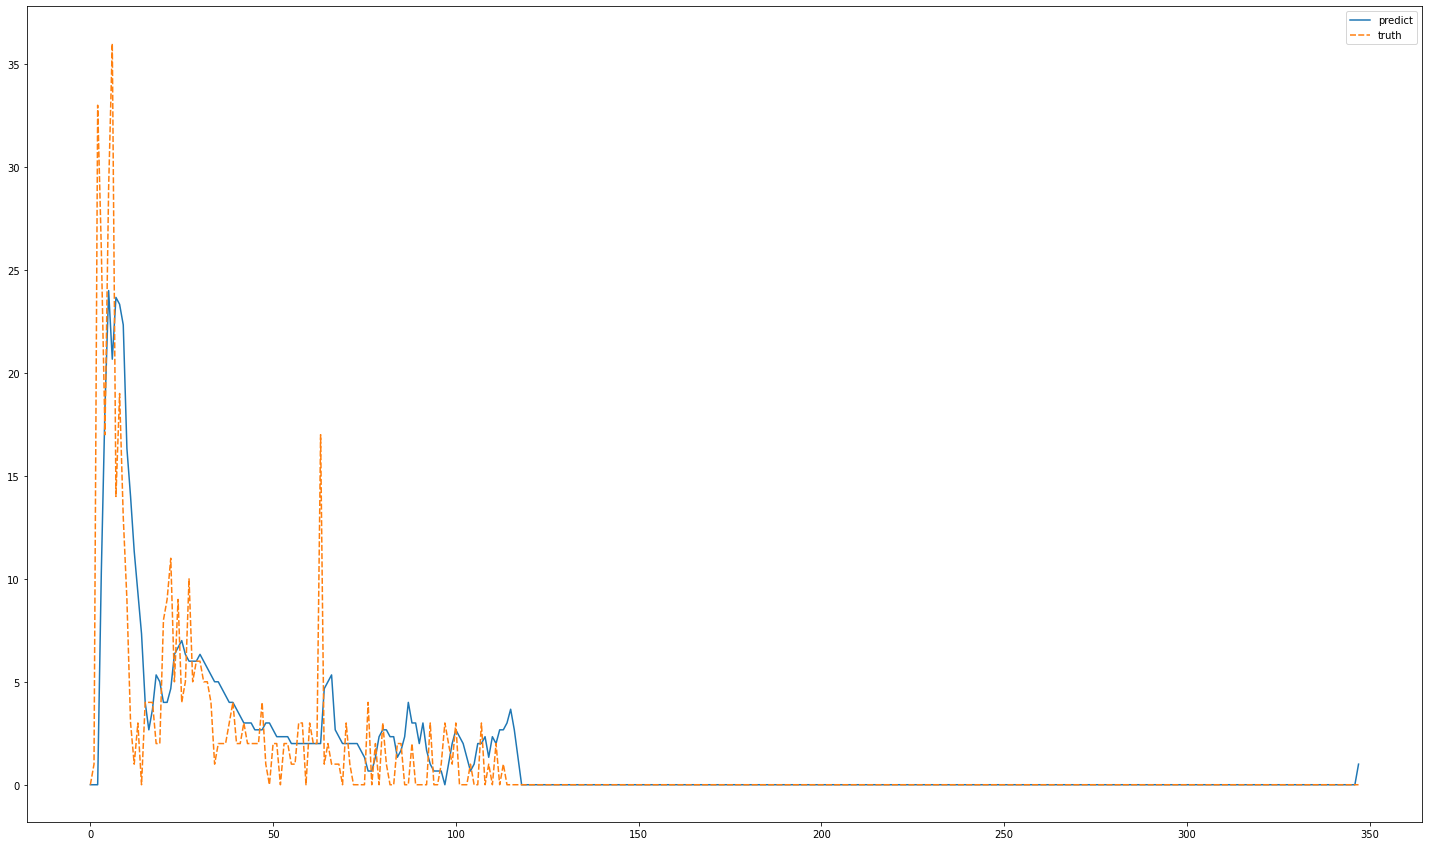

In [62]:
num = round(np.random.rand()*100)


temp = X_test[350*num:350 + 350*num].copy()
result_list = []

history_daytime = temp[0:1]

for i in range(1, 350):
          # Nếu model_classifier dự báo không bán thì mặc định sức bán là 0
          result_classifier = model_classifier.predict(history_daytime)

          result_regression = [0]
          if result_classifier != 0:
                    # Lấy sức bán ngày tiếp theo model dự đoán
                    result_regression = np.round(model.predict(history_daytime))

          # Add sức bán vào list để xí visualize
          result_list.append(result_regression)

          # Lấy thông tin về ngày tháng tiếp theo
          history_daytime = temp[i:i+1]

          if i == 349:
                    result_list.append(np.round(model.predict(history_daytime)))

result_list = np.asarray(result_list)
result_list = result_list[:, 0]

def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

result_list = moving_average(result_list)
result_list.shape

df = pd.DataFrame({'predict': result_list,'truth': y_test[350*num + 2:350 + 350*num]})

fig, ax = plt.subplots(1,1,figsize = (25, 15))
sns.lineplot(data = df, ax = ax)

<AxesSubplot:>

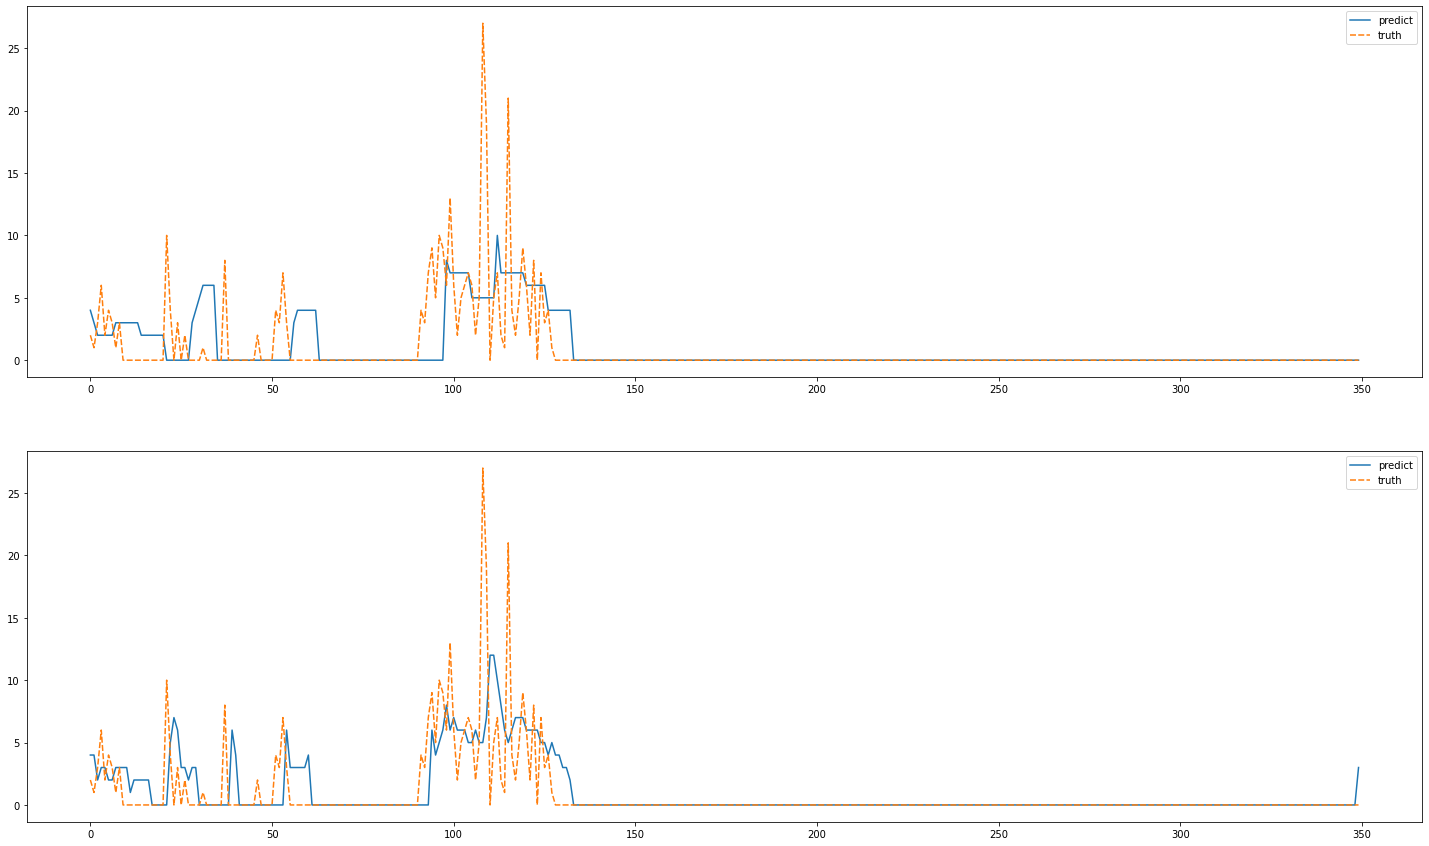

In [70]:
num = round(np.random.rand()*100)


temp = X_test[350*num:350 + 350*num].copy()

result_list = []


for i in range(0, 350, 7):
          history_daytime = temp[i]
          history_daytime[2:15] = moving_average(history_daytime[:15])


          for j in range(i, i + 7, 1):
                    # Nếu model_classifier dự báo không bán thì mặc định sức bán là 0
                    result_classifier = model_classifier.predict([history_daytime])

                    result_regression = [0]
                    if result_classifier != 0:
                              # Lấy sức bán ngày tiếp theo model dự đoán
                              result_regression = np.round(model.predict([history_daytime]))

                    # Add sức bán vào list để xí visualize
                    result_list.append(result_regression)

                    # Lấy thông tin về ngày tháng tiếp theo
                    history_daytime = temp[i + 1]


                    # Lấy thông tin về sức bán
                    history_daytime[14] = result_regression[0]

result_list = np.asarray(result_list)
result_list = result_list[:, 0]

df = pd.DataFrame({'predict': result_list,'truth': y_test[350*num:350 + 350*num]})

fig, ax = plt.subplots(2,1,figsize = (25, 15))
sns.lineplot(data = df, ax = ax[0])


temp = X_test[350*num:350 + 350*num].copy()

result_list = []

history_daytime = temp[0:1]

for i in range(1, 350):
          # Nếu model_classifier dự báo không bán thì mặc định sức bán là 0
          history_daytime[:,2:15] = moving_average(history_daytime[:,:15])
          result_classifier = model_classifier.predict(history_daytime)

          result_regression = [0]
          if result_classifier != 0:
                    # Lấy sức bán ngày tiếp theo model dự đoán
                    result_regression = np.round(model.predict(history_daytime))

          # Add sức bán vào list để xí visualize
          result_list.append(result_regression)

          # Lấy thông tin về ngày tháng tiếp theo
          history_daytime = temp[i:i+1]

          if i == 349:
                    result_list.append(np.round(model.predict(history_daytime)))


result_list = np.asarray(result_list)
result_list = result_list[:, 0]
result_list.shape

df = pd.DataFrame({'predict': result_list,'truth': y_test[350*num:350 + 350*num]})


sns.lineplot(data = df, ax = ax[1])